In [3]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df = df[['Order Date', 'Sales']]
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')


In [5]:
df_monthly = (
    df
    .groupby(pd.Grouper(key='Order Date', freq='M'))
    .sum()
    .reset_index()
)


/tmp/ipython-input-2359134421.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Order Date', freq='M'))


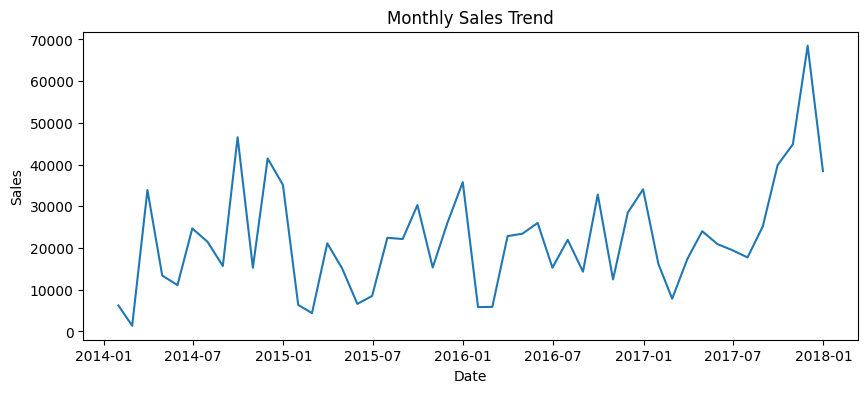

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_monthly['Order Date'], df_monthly['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [7]:
df_prophet = df_monthly.rename(columns={
    'Order Date': 'ds',
    'Sales': 'y'
})


In [8]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


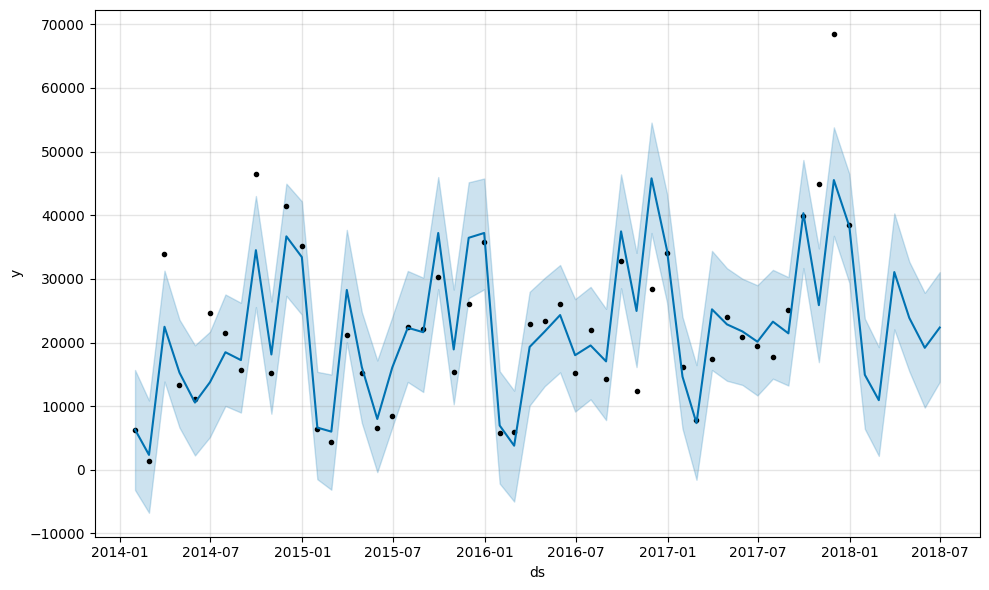

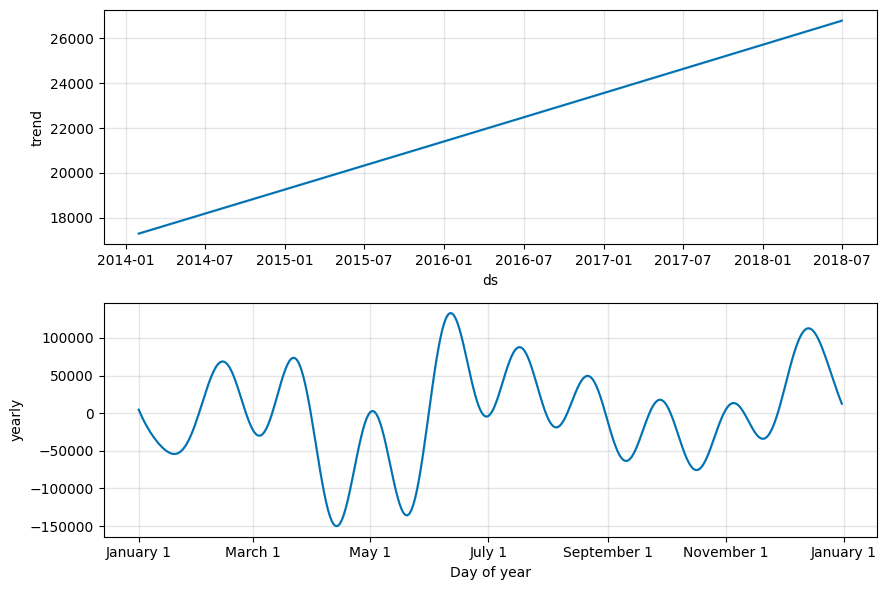

In [10]:
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()


In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    "sales_forecast.csv", index=False
)
